In [1]:
import geojson
from datetime import datetime
import pandas as pd
import requests

In [5]:
pd.read_csv("../data/54152.csv", encoding="latin-1", sep=";")

,Cruise,Dive,Date,Time,Image.name,Latitude,Longitude,Depth,Habitat,Class,Order,Family,Genus,Species,Final.name,OTU,Nb
0,BobEco,470,21/09/2011,15:00:41,BE470_110921150041,47.585469,-7.527959,1396,CW Antipatharians and/or Gorgonians on Hard Su...,Anthozoa,Alcyonacea,Isididae,Acanella,sp. 2,Acanella sp. 2,IF017,1
1,BobEco,470,21/09/2011,03:13:41,BE470_110921031341,47.541743,-7.540701,2018,CW Antipatharians and/or Gorgonians on Hard Su...,Anthozoa,Alcyonacea,Isididae,Acanella,sp. 2,Acanella sp. 2,IF017,1
2,BobEco,472,27/09/2011,01:56:05,BE472_110927015605,48.119262,-9.151569,1820,CW Antipatharians and/or Gorgonians on Hard Su...,Anthozoa,Alcyonacea,Plexauridae,NaN,sp. 1,Plexauridae sp. 1,IF073,3
3,BobEco,466,14/09/2011,00:11:34,BE466_110915001134,45.681601,-3.620943,736,CW Antipatharians and/or Gorgonians on Hard Su...,Anthozoa,NaN,NaN,NaN,spp.,Anthozoa spp.,IF145,4
4,Evhoe 2011,3,08/11/2011,19:50:04,EVH11-PL03-SCAN1-20111108-195004-000,47.499124,-7.124179,1432,CW Antipatharians and/or Gorgonians on Hard Su...,Anthozoa,Scleractinia,NaN,NaN,solitary coral spp.,solitary coral spp.,IF170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,Evhoe 2011,3,08/11/2011,18:46:04,EVH11-PL03-SCAN1-20111108-184604-000,47.513825,-7.135817,891,Solitary Scleractinians on Soft Substrate,Anthozoa,Scleractinia,Flabellidae,NaN,sp. 1,Flabellidae sp. 1,IF140,2
3573,Evhoe 2011,3,08/11/2011,18:47:04,EVH11-PL03-SCAN1-20111108-184704-000,47.513466,-7.135769,894,Solitary Scleractinians on Soft Substrate,Anthozoa,Scleractinia,Flabellidae,NaN,sp. 1,Flabellidae sp. 1,IF140,1
3574,Evhoe 2011,3,08/11/2011,18:46:04,EVH11-PL03-SCAN1-20111108-184604-000,47.513825,-7.135817,891,Solitary Scleractinians on Soft Substrate,Anthozoa,NaN,NaN,NaN,spp.,Anthozoa spp.,IF145,1
3575,Evhoe 2011,3,08/11/2011,18:18:04,EVH11-PL03-SCAN1-20111108-181804-000,47.518285,-7.139910,770,Solitary Scleractinians on Soft Substrate,Anthozoa,Scleractinia,Flabellidae,NaN,sp. 1,Flabellidae sp. 1,IF140,2


In [2]:
!ls

Untitled.ipynb


In [49]:

with open("../data/parcours_navir/CAMPAGNE_LIGNE.geojson") as f:
    gj = geojson.load(f)
features = gj['features'][0]

In [51]:
len(gj['features'])

4729

In [54]:
# format
format = '%Y-%m-%d'

features = [x for x in gj["features"] if datetime.strptime(x["properties"]["START_DATE"], format).year == 2021]

In [38]:
gj["features"][0]["properties"]["START_DATE"]

'1984-01-09'

In [42]:

  
# convert from string format to datetime format
date = datetime.strptime(input, format)

In [45]:
date.year == 2022

False

In [14]:
gj.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [9]:
with open("../data/emission_impulsive_forte_2016/DCSMM2018_D11C1.3.geojson") as f:
    gj = geojson.load(f)
features = gj['features'][0]

In [10]:
gj['features'][500]

{"geometry": {"coordinates": [[[3.875, 51.125], [4.125, 51.125], [4.125, 50.875], [3.875, 50.875], [3.875, 51.125]]], "type": "Polygon"}, "id": 500, "properties": {"GGN": null, "GGS": null, "MC": null, "MMN": null, "MO": null, "ZEE": null, "id": 504, "lat": 51.0, "lon": 4.0, "xmax": 4.125, "xmin": 3.875, "ymax": 51.125, "ymin": 50.875}, "type": "Feature"}

In [7]:
gj.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [58]:
min_longitude = -2.250511
max_longitude = -0.802813
min_latitude = 45.670575
max_latitude = 46.378693
top_left = (max_latitude, min_longitude)
top_right = (max_latitude, max_longitude)
bottom_left = (min_latitude, min_longitude)
bottom_right = (min_latitude, max_longitude)

# Position des bateaux

In [37]:
api_key = "af3f41ea705f7881e533cdac088cfe72c154be34"

In [41]:
url = "https://services.marinetraffic.com/api/exportvesseltrack"
url

'https://services.marinetraffic.com/api/exportvesseltrack'

In [39]:
headers = {'Content-Type': 'application/json'}
res = requests.get(url, headers=headers, params={"api_key": api_key})
res

<Response [400]>

In [40]:
res.text

'<?xml version="1.0" encoding="UTF-8"?>\n<RESPONSE>\n    <STATUS>\n        <ERROR CODE="2a9" DESCRIPTION="MANDATORY FIELD MISSING"/>\n    </STATUS>\n</RESPONSE>'

In [66]:
from marinetrafficapi import MarineTrafficApi
from tqdm.notebook import tqdm

api = MarineTrafficApi(api_key="af3f41ea705f7881e533cdac088cfe72c154be34")

In [72]:
int(max_latitude - min_latitude)

0

In [70]:
la_rochelle_vessel_position = []
current_lat, current_long = min_latitude, min_longitude
for lat_delta in tqdm(range(int(max_latitude - min_latitude) + 1)):
    for long_delta in range(int(max_longitude - min_longitude) + 1):
        vessel_positions = api.vessel_historical_track(period='daily', 
                                                       days=3, 
                                                       mmsi=241486000,
                                                       min_longitude=current_long,
                                                       max_longitude=current_long + long_delta,
                                                       min_latitude=current_lat,
                                                       max_latitude=current_lat + lat_delta)
        current_lat, current_long = current_lat + lat_delta, current_long + long_delta
        la_rochelle_vessel_position += vessel_positions.to_list

  0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
vessel_positions = api.vessel_historical_track(period='daily', 
                                               days=3, 
                                               min_longitude=min_longitude,
                                               max_longitude=min_longitude+1,
                                               min_latitude=min_latitude,
                                               max_latitude=min_latitude+1)

MarineTrafficRequestApiException: Request errors: code 5a2: INSUFFICIENT CREDITS. You currently have 6 credits while 389 is/are required to fulfil this API call. You can purchase additional credits at: https://www.marinetraffic.com/en/online-services/plans?id=credits

In [69]:
vessel_positions.to_list

[]

In [48]:
MarineTrafficApi.print_params_for('vessel_historical_track')

Default params:
+----------+------------------------------+-----------+-------------------------------------------------------------------------+
| name     | type                         | arguments | description                                                             |
+----------+------------------------------+-----------+-------------------------------------------------------------------------+
| protocol | <aenum 'DefaultQueryParams'> |           | Response type. Use one of the following: xml, csv, json, jsono (object) |
+----------+------------------------------+-----------+-------------------------------------------------------------------------+
| msg_type | <aenum 'DefaultQueryParams'> |           | simple or extended (extended cost more credits)                         |
+----------+------------------------------+-----------+-------------------------------------------------------------------------+
PS01QueryParams params:
+---------------+---------------------------+-----

In [49]:
response = api.__api_call_method__(protocol='json'|'jsono'|'csv'|'xml', # default is jsono
                                   msg_type='simple'|'extended',  # default is simple
                                   timeout=10) # default is 5 (5 seconds)

AttributeError: 'Client' object has no attribute '__api_call_method__'

In [1]:
import sys
import importlib
import numpy as np
import math
from math import pi, sin, acos, cos
sys.path.insert(0, "/home/mqueyrel/Documents/SoundInOcean/")

In [2]:
from population.noise_impactor import NoiseImpactor, Boat, FishingBoat, PileDriving

In [135]:
maille_TL = compute_decibels_matrix(45.8, -1.8)

In [137]:
SLi = compute_SLi(10, 30)

In [157]:
min_longitude = -2.250511
max_longitude = -0.802813
min_latitude = 45.670575
max_latitude = 46.378693

range_lat = np.arange(min_latitude, max_latitude, 0.01)
range_long = np.arange(min_longitude, max_longitude, 0.0015)

In [184]:
df_res = pd.DataFrame(RL)
df_res.columns = range_long
df_res["lat"] = range_lat

In [185]:
df_res = df_res.melt(id_vars=["lat"], 
        var_name="lon", 
        value_name="value")

In [191]:
RL

array([[ -9.51714265,  -9.51047656,  -9.50382252, ..., -12.28720383,
        -12.2949817 , -12.30275736],
       [ -9.39966741,  -9.39281716,  -9.38597898, ..., -12.22590068,
        -12.23379045, -12.24167779],
       [ -9.28109361,  -9.27405231,  -9.26702312, ..., -12.16483549,
        -12.17283834, -12.18083851],
       ...,
       [ -3.69773934,  -3.67191049,  -3.64601403, ..., -10.18136096,
        -10.19414097, -10.20690267],
       [ -3.78719415,  -3.76188887,  -3.73652043, ..., -10.20222367,
        -10.2149448 , -10.22764787],
       [ -3.88236199,  -3.85760233,  -3.83278399, ..., -10.22473081,
        -10.23738853, -10.25002848]])

In [190]:
df_res

,lat,lon,value,geometry
0,45.670575,-2.250511,-9.517143,POINT (-2.25051 45.67057)
1,45.680575,-2.250511,-9.399667,POINT (-2.25051 45.68057)
2,45.690575,-2.250511,-9.281094,POINT (-2.25051 45.69057)
3,45.700575,-2.250511,-9.161420,POINT (-2.25051 45.70057)
4,45.710575,-2.250511,-9.040645,POINT (-2.25051 45.71057)
...,...,...,...,...
68581,46.330575,-0.803011,-10.170413,POINT (-0.80301 46.33057)
68582,46.340575,-0.803011,-10.187817,POINT (-0.80301 46.34057)
68583,46.350575,-0.803011,-10.206903,POINT (-0.80301 46.35057)
68584,46.360575,-0.803011,-10.227648,POINT (-0.80301 46.36057)


In [186]:
import geopandas
gdf = geopandas.GeoDataFrame(
    df_res, geometry=geopandas.points_from_xy(df_res.lon, df_res.lat))

In [178]:
gdf.to_file("../data/heatmap.geojson", driver="GeoJSON")

<AxesSubplot:>

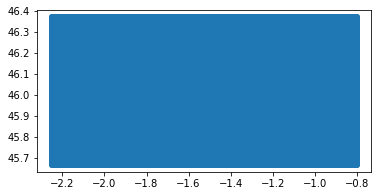

In [189]:
gdf.plot()

In [148]:
RL = update_decibels_matrix_with_speed(maille_TL, SLi, 1)

In [156]:
RL

array([[ -9.51714265,  -9.51047656,  -9.50382252, ..., -12.28720383,
        -12.2949817 , -12.30275736],
       [ -9.39966741,  -9.39281716,  -9.38597898, ..., -12.22590068,
        -12.23379045, -12.24167779],
       [ -9.28109361,  -9.27405231,  -9.26702312, ..., -12.16483549,
        -12.17283834, -12.18083851],
       ...,
       [ -3.69773934,  -3.67191049,  -3.64601403, ..., -10.18136096,
        -10.19414097, -10.20690267],
       [ -3.78719415,  -3.76188887,  -3.73652043, ..., -10.20222367,
        -10.2149448 , -10.22764787],
       [ -3.88236199,  -3.85760233,  -3.83278399, ..., -10.22473081,
        -10.23738853, -10.25002848]])

In [149]:
RL2 = update_decibels_matrix_with_speed(maille_TL, SLi, 2)
RL3 = update_decibels_matrix_with_speed(maille_TL, SLi, 3)

In [150]:
import seaborn

<AxesSubplot:>

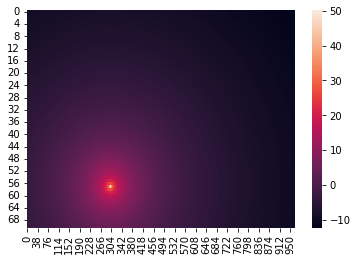

In [151]:
seaborn.heatmap(RL)

In [154]:
RL / RL2

array([[ -9.07835925,  -9.01467845,  -8.95191016, ...,   7.13655223,
          7.10895515,   7.08161292],
       [ -8.06279111,  -8.0098495 ,  -7.95761456, ...,   7.36311468,
          7.33302231,   7.30322241],
       [ -7.22611661,  -7.18126489,  -7.13697547, ...,   7.60606487,
          7.57317412,   7.54062015],
       ...,
       [ -0.53842187,  -0.5326577 ,  -0.52692164, ..., -26.5060514 ,
        -27.45271168, -28.46535103],
       [ -0.55872483,  -0.55292731,  -0.54715844, ..., -28.08581163,
        -29.14136628, -30.27474882],
       [ -0.58092115,  -0.57508575,  -0.56927961, ..., -30.00701024,
        -31.20327314, -32.49365657]])

<AxesSubplot:>

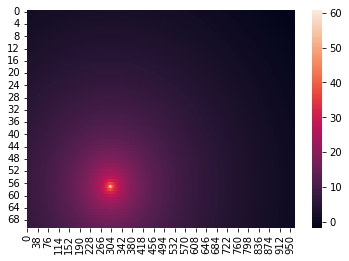

In [152]:
seaborn.heatmap(RL2)

<AxesSubplot:>

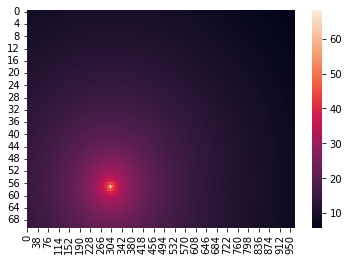

In [153]:
seaborn.heatmap(RL3)

In [ ]:
np.arccos

In [179]:
fish = geopandas.read_file("../data/Fish.geojson")

<AxesSubplot:>

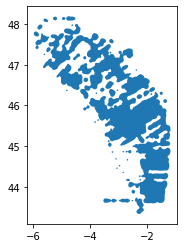

In [180]:
fish.plot()

In [181]:
fish

,ID,Prob,geometry
0,SC,0.95,"MULTIPOLYGON Z (((-3.81791 45.57293 0.00000, -..."
1,SC,0.75,"MULTIPOLYGON Z (((-4.49558 46.52497 0.00000, -..."
2,SC,0.50,"MULTIPOLYGON Z (((-3.55646 45.68039 0.00000, -..."


In [3]:
import sys
import importlib
import numpy as np
import math
from math import pi, sin, acos, cos
sys.path.insert(0, "/home/mqueyrel/Documents/SoundInOcean/")
import population
importlib.reload(population.noise_impactor)
from population.noise_impactor import FishingBoat, Cargo, PileDriving
from population.simulator import Simulator
import pandas as pd
import geopandas
import seaborn

In [45]:
# min_longitude = -2.250511
# max_longitude = -0.802813
# min_latitude = 45.670575
# max_latitude = 46.378693

speed = 10
lat = 45.9
long=-1.9
boat1 = FishingBoat(lat=45.70, long=-2.1, speed=10)
boat2 = FishingBoat(lat=lat, long=long, speed=speed)
boat3 = FishingBoat(lat=46, long=-1.9, speed=10)

simu = Simulator(noise_impactors=[boat1, boat2, boat3], marine_fauna_files=None)
simu = Simulator(noise_impactors=[boat2], marine_fauna_files=None)

hm_total = simu.compute_and_add_heatmaps()


hm_total_quantified = hm_total.copy()

val_dead = 62
val_mean = 55
val_zen = 51

hm_total_quantified[hm_total_quantified < val_zen] = 0
hm_total_quantified[(hm_total_quantified <= val_mean) & (hm_total_quantified >= val_zen)] = 1
hm_total_quantified[(hm_total_quantified <= val_dead) & (hm_total_quantified >= val_mean)] = 2
hm_total_quantified[hm_total_quantified > val_dead] = 3

print("lat", lat, "long", long)

lat 45.9 long -1.9


<AxesSubplot:>

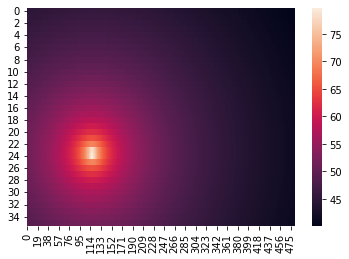

In [40]:
seaborn.heatmap(hm_total)

<AxesSubplot:>

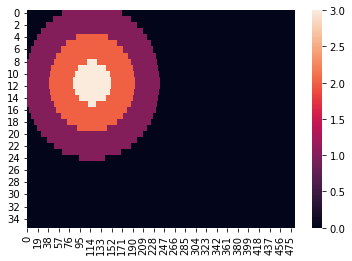

In [41]:
seaborn.heatmap(hm_total_quantified[::-1])

In [42]:
# df_res = pd.DataFrame(hm_total)
# df_res.columns = boat1.range_long
# df_res["lat"] = boat1.range_lat
# df_res = df_res.melt(id_vars=["lat"], 
#         var_name="lon", 
#         value_name="value")

# gdf = geopandas.GeoDataFrame(
#     df_res, geometry=geopandas.points_from_xy(df_res.lon, df_res.lat))

# gdf.to_file("../data/decibels.geojson", driver="GeoJSON")

In [43]:
df_res = pd.DataFrame(hm_total_quantified[::-1])
df_res.columns = boat1.range_long
df_res["lat"] = boat1.range_lat
df_res = df_res.melt(id_vars=["lat"], 
        var_name="lon", 
        value_name="value")

gdf = geopandas.GeoDataFrame(
    df_res, geometry=geopandas.points_from_xy(df_res.lon, df_res.lat))

In [102]:
gdf.to_file("../data/decibels_quantified.geojson", driver="GeoJSON")

,lat,lon,value,geometry
0,45.670575,-2.250511,0.0,POINT (-2.25051 45.67057)
1,45.690575,-2.250511,0.0,POINT (-2.25051 45.69058)
2,45.710575,-2.250511,0.0,POINT (-2.25051 45.71058)
3,45.730575,-2.250511,0.0,POINT (-2.25051 45.73058)
4,45.750575,-2.250511,0.0,POINT (-2.25051 45.75058)
...,...,...,...,...
17383,46.290575,-0.804511,0.0,POINT (-0.80451 46.29058)
17384,46.310575,-0.804511,0.0,POINT (-0.80451 46.31058)
17385,46.330575,-0.804511,0.0,POINT (-0.80451 46.33058)
17386,46.350575,-0.804511,0.0,POINT (-0.80451 46.35058)


In [44]:
gdf[gdf["value"].isin([1,2,3])].to_file(f"../data/safe_zone_{speed}_noeuds.geojson", driver="GeoJSON")
gdf[gdf["value"].isin([2,3])].to_file(f"../data/hurt_zone_{speed}_noeuds.geojson", driver="GeoJSON")
gdf[gdf["value"] == 3].to_file(f"../data/dead_zone_{speed}_noeuds.geojson", driver="GeoJSON")

In [145]:
gdf[gdf["value"] == 1].to_file("../data/safe_zone_hole.geojson", driver="GeoJSON")
gdf[gdf["value"] == 2].to_file("../data/hurt_zone_hole.geojson", driver="GeoJSON")